## Logistic Regression

In this project I've used Logistic Regression classification algorithm on iris dataset from sklearn.datasets and evaluated accuracy computed by it.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

#### Loading a dataset

In [2]:
from sklearn.datasets import load_iris
iris= load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Clean column names.

df.rename(columns={'sepal length (cm)': 'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'}, inplace= True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target']= iris.target
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
df['flower_name']= df.target.apply( lambda x: iris.target_names[x])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


#### Removed target col and string col.

In [11]:
X= df.drop(['target','flower_name'], axis=1)
y= df.target

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 3) # random state is not used.

In [13]:
len(X_train)

105

In [14]:
len(X_test)

45

In [15]:
model= LogisticRegression()
model.fit(X_train, y_train)
predictions= model.predict(X_test)
    
print('Accuracy of Logistic Regression model is:', metrics.accuracy_score(y_test, predictions))
print('Error of Logistic Regression model is:', metrics.mean_squared_error(y_test, predictions))

Accuracy of Logistic Regression model is: 0.9777777777777777
Error of Logistic Regression model is: 0.022222222222222223


#### Confusion matrix

In [16]:
cm= metrics.confusion_matrix(y_test, predictions)
cm

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]], dtype=int64)

Text(33.0, 0.5, 'Truth')

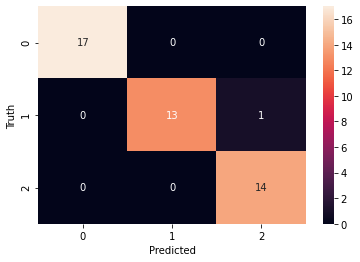

In [18]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
kf= KFold(5,True,1)

In [21]:
score= cross_val_score(model, X, y, cv= kf, scoring= 'accuracy')
mean= np.mean(score)
mean

0.96

#### So we can conclude that on Iris data set Logistic regression model performed quite well.